In [1]:
from skimage.feature import local_binary_pattern
from skimage import exposure,feature
import matplotlib.pyplot as plt 
import cv2
import numpy as np
import os
from scipy.special import iv
import matplotlib.pyplot as plt
from ewt.ewt2d import *
from ewt.utilities import ewt_params

from sklearn.cluster import KMeans

def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram
np.random.seed(4)

X = []
Y = []
Z = []
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist
classvector=-1
for root, dirs, files in os.walk(r"C:\Users\sunda\OneDrive - Amrita Vishwa Vidyapeetham\Breast Cancer Detection\BCDR Dataset\Training_1"):
    print('.....Starting......')
    count = 0
    for _ in range(len(files)):
        Y.append(classvector)
    classvector = classvector + 1

    for imageName in files:
        imagePath=f'{root}\{imageName}'
        image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

        total = len(files)
        count = count + 1
        params = ewt_params()
        params.log = 1
        transform = 'lp'
        params.option = 2
        params.detect = 'locmaxminf'

        params.typeDetect = 'otsu'
        #f = np.genfromtxt('Tests/2d/texture.csv', delimiter=',')
        f = image
        #f = (f-np.min(f))/(np.max(f)-np.min(f))
        #f = f[0:-1,0:-1]
        [ewtc, mfb, bounds_scales] = ewt2dLP(f,params)
        image = ewtc[10]
        #lbp = local_binary_pattern(image,1,8,method='uniform')
        sift = cv2.xfeatures2d.SIFT_create()
        #fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(8, 8), sharex=True, sharey=True)
        #ax1.axis('off')
        #ax1.imshow(image, cmap=plt.cm.gray)
        #ax1.set_title('Input image')
#image = ewtc[10]
#image = image[:,1]
        sift_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
#image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#keypoints = sift.detect(image)
        keypoints, descriptor = sift.detectAndCompute(sift_image,None)
# Rescale histogram for better display
#hog_image_rescaled = exposure.rescale_intensity(lbp, in_range=(0, 10))
        #ax2.axis('off')
        #ax2.imshow(lbp, cmap=plt.cm.gray)
        #ax2.set_title('Local Binary Pattern')
#image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        #img = cv2.drawKeypoints(image,keypoints,None)
#hog_image_rescaled = exposure.rescale_intensity(keypoints, in_range=(0, 10))
#plt.imshow(img)
#lbp_flatten = lbp.flatten()
#print(lbp_flatten.shape)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
        #ax3.axis('off')
        #ax3.set_title('SIFT')
        #ax3.imshow(img, cmap=plt.cm.gray)
        #ax3.set_title('SIFT output')
        lbp_descriptor = LocalBinaryPatterns(numPoints=9,radius=8)
        lbp_featurevectors = lbp_descriptor.describe(image)
        kmeans = KMeans(n_clusters=10)
        kmeans.fit(descriptor)
        sift_features = build_histogram(descriptor,kmeans)/np.size(keypoints)
        featurevectors = np.concatenate((lbp_featurevectors,sift_features),axis=0)
        featurevectors = np.array(featurevectors)
        X.append(featurevectors)
        Z.append(imageName)
        print(f'.......{imageName}, and {count}/{total} is done')

    print(".........................................................")
    print("......Stopping.....")

.....Starting......
.........................................................
......Stopping.....
.....Starting......
.......Patient_13_LCC.jpg, and 1/358 is done
.......Patient_13_LO.jpg, and 2/358 is done
.......Patient_14_LCC.jpg, and 3/358 is done
.......Patient_14_LO.jpg, and 4/358 is done
.......Patient_16_LO.jpg, and 5/358 is done
.......Patient_16_RO.jpg, and 6/358 is done
.......Patient_17_LCC.jpg, and 7/358 is done
.......Patient_17_LO.jpg, and 8/358 is done
.......Patient_17_RCC.jpg, and 9/358 is done
.......Patient_17_RO.jpg, and 10/358 is done
.......Patient_18_LCC.jpg, and 11/358 is done
.......Patient_18_LO.jpg, and 12/358 is done
.......Patient_18_RCC.jpg, and 13/358 is done
.......Patient_18_RO.jpg, and 14/358 is done
.......Patient_19_RCC.jpg, and 15/358 is done
.......Patient_19_RO.jpg, and 16/358 is done
.......Patient_20_LCC.jpg, and 17/358 is done
.......Patient_20_LO.jpg, and 18/358 is done
.......Patient_20_RCC.jpg, and 19/358 is done
.......Patient_20_RO.jpg, a

In [2]:
X= np.array(X)
print(X.shape)
Y = np.array(Y)
print(Y.shape)
print(Y)
print(Z)

(781, 21)
(781,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1

In [3]:
#patient_number = [i for i in Z.split() if i.isdigit()]
import re 
patient_number = []
for i in Z:
    #number = [j for j in i if j.isdigit()]
    #for n in number:
     #   patient_number += n
    number1 =''
    number = re.findall('\d+', i)
    for n in number:
        number1 +=n
    patient_number.append(number1)
    #number = int(filter(str.isdigit, i))
    #patient_number.append(number)
    #for j in i.split():
     #  if j.isdigit():
      #      print(j)
       #     print('\n')
        #if j.isdigit():
            #patient_number.append(j)
   # patient_number = [int(j) for j in i if j.isdigit()]
print(patient_number)

['13', '13', '14', '14', '16', '16', '17', '17', '17', '17', '18', '18', '18', '18', '19', '19', '20', '20', '20', '20', '21', '21', '23', '23', '23', '23', '24', '24', '252', '252', '253', '253', '253', '253', '254', '255', '255', '255', '255', '257', '257', '257', '257', '25', '25', '25', '25', '265', '265', '265', '265', '269', '269', '269', '269', '26', '26', '26', '26', '271', '271', '272', '272', '272', '272', '273', '273', '273', '273', '275', '275', '275', '275', '278', '278', '279', '279', '27', '27', '27', '27', '282', '282', '282', '282', '283', '283', '283', '283', '286', '289', '289', '289', '289', '28', '28', '290', '290', '290', '290', '2', '2', '306', '306', '306', '306', '314', '314', '314', '314', '315', '31', '31', '31', '31', '323', '323', '323', '323', '325', '325', '326', '326', '326', '326', '328', '328', '328', '328', '32', '32', '331', '331', '335', '335', '335', '335', '332', '33', '332', '33', '34', '34', '34', '35', '35', '36', '36', '36', '37', '37', '37', 

In [4]:
import pandas as pd
other_features = pd.read_excel('otherparameters.xlsx')
other_features
print(len(other_features))

572


In [5]:
list1 = []
list2 = []
patient_number1 =[]
for i in patient_number:
    patient_number1.append(np.dtype('int64').type(i))
for i in patient_number1:
    for j in range(len(other_features)):
        z= other_features.iloc[j,0]
        if(i==z):
            list1.append(other_features.iloc[j,1])
            list2.append(other_features.iloc[j,2])
print(len(list1))
print(len(list2))
for i in range(4):
    list1.append(0)
    list2.append(0)
print(len(list1))
print(len(list2))

777
777
781
781


In [117]:
print(len(X))

781


In [6]:
list1 = np.array(list1)
list2 = np.array(list2)
df2 = pd.DataFrame(data=X)
df2['age'] = list1
df2['density'] = list2
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,age,density
0,0.098587,0.104642,0.026294,0.008369,0.003502,0.004303,0.010713,0.022139,0.109420,0.090604,...,0.041237,0.092784,0.123711,0.077320,0.115979,0.123711,0.118557,0.051546,37,3
1,0.112892,0.106452,0.021278,0.007686,0.004392,0.004036,0.009942,0.015551,0.110755,0.102772,...,0.149254,0.104478,0.095522,0.083582,0.086567,0.071642,0.113433,0.059701,37,3
2,0.100873,0.112803,0.016026,0.010565,0.005342,0.004452,0.009526,0.016144,0.111705,0.109034,...,0.091922,0.158774,0.114206,0.114206,0.150418,0.119777,0.058496,0.125348,58,3
3,0.117521,0.108856,0.015670,0.005639,0.002938,0.002048,0.004155,0.012910,0.112595,0.127582,...,0.097561,0.156794,0.055749,0.153310,0.020906,0.066202,0.062718,0.121951,58,3
4,0.148771,0.104196,0.012435,0.002344,0.000890,0.001603,0.001810,0.011159,0.104523,0.145685,...,0.128028,0.096886,0.086505,0.117647,0.083045,0.096886,0.159170,0.038062,57,2
5,0.142717,0.107639,0.012138,0.002404,0.001157,0.001603,0.002493,0.012286,0.106274,0.155449,...,0.152866,0.047771,0.162420,0.117834,0.060510,0.089172,0.124204,0.076433,57,2
6,0.118946,0.112862,0.014512,0.005045,0.003294,0.002315,0.003413,0.013681,0.114554,0.125089,...,0.135849,0.083019,0.147170,0.041509,0.071698,0.105660,0.173585,0.067925,62,2
7,0.152511,0.105621,0.010535,0.001543,0.000950,0.000801,0.002077,0.010743,0.108114,0.147139,...,0.055866,0.106145,0.033520,0.083799,0.117318,0.128492,0.162011,0.106145,62,2
8,0.112179,0.098765,0.024395,0.006173,0.005728,0.005104,0.005639,0.018697,0.099715,0.122388,...,0.132231,0.107438,0.070248,0.157025,0.070248,0.057851,0.123967,0.123967,62,2
9,0.134942,0.110844,0.012079,0.004155,0.001810,0.001187,0.003057,0.012286,0.112417,0.140699,...,0.170507,0.096774,0.092166,0.059908,0.087558,0.087558,0.110599,0.110599,62,2


In [7]:
df2.to_excel('X_Values2.xlsx',index=False)
#df1 = pd.DataFrame(Y)
#df1.to_excel('Y_Values.xlsx',index=False)

In [4]:
#import pandas as pd 
#patient_number = np.array(patient_number)
#df = pd.DataFrame(data=X)
#df['Patient number'] = patient_number
#df.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Patient number
776,0.052202,0.049709,0.003947,0.000267,0.000267,0.000505,0.000000,0.000000,0.00000,0.000000,...,0.019027,0.109937,0.073996,0.097252,0.071882,0.012685,0.057082,0.048626,0.093023,870
777,0.048255,0.045821,0.015046,0.005401,0.001988,0.001395,0.000178,0.000030,0.00003,0.000000,...,0.063452,0.025381,0.050761,0.076142,0.098985,0.048223,0.048223,0.088832,0.053299,870
778,0.059651,0.047127,0.018667,0.006173,0.001929,0.003354,0.000089,0.000030,0.00003,0.000000,...,0.034483,0.014368,0.077586,0.048851,0.114943,0.097701,0.054598,0.051724,0.083333,97
779,0.060037,0.050451,0.018786,0.004689,0.001276,0.001098,0.000089,0.000089,0.00003,0.000000,...,0.055728,0.099071,0.058824,0.068111,0.061920,0.065015,0.095975,0.114551,0.046440,97
780,0.053359,0.049294,0.017539,0.004570,0.001573,0.000890,0.000178,0.000030,0.00000,0.000089,...,0.092219,0.074928,0.020173,0.077810,0.037464,0.072046,0.080692,0.080692,0.077810,9


In [187]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X = df2
X_res,Y_res = smk.fit_sample(X,Y)
#X_res1,p_res = smk.fit_sample(X,patient_number)
X

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,age,density
0,0.052291,0.064815,0.010565,0.007271,0.001039,0.000890,0.000059,0.000148,0.000119,0.000148,...,0.110825,0.095361,0.051546,0.061856,0.054124,0.074742,0.038660,0.074742,37,3
1,0.058612,0.075647,0.012019,0.006262,0.000564,0.000297,0.000030,0.000030,0.000148,0.000030,...,0.056716,0.062687,0.095522,0.056716,0.023881,0.062687,0.077612,0.047761,37,3
2,0.058434,0.075202,0.013325,0.007716,0.001128,0.000594,0.000119,0.000237,0.000297,0.000326,...,0.086351,0.055710,0.080780,0.044568,0.052925,0.108635,0.047354,0.089136,58,3
3,0.074994,0.074282,0.015017,0.007093,0.000712,0.000623,0.000089,0.000000,0.000059,0.000178,...,0.069686,0.094077,0.066202,0.048780,0.017422,0.097561,0.087108,0.076655,58,3
4,0.098973,0.076330,0.020685,0.003324,0.000712,0.000297,0.000030,0.000148,0.000059,0.000030,...,0.076125,0.086505,0.034602,0.051903,0.044983,0.086505,0.083045,0.024221,57,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.074104,0.070097,0.013206,0.006499,0.000623,0.000148,0.000059,0.000059,0.000000,0.000030,...,0.086207,0.094828,0.054598,0.066092,0.077586,0.086207,0.066092,0.051724,45,2
777,0.077428,0.073392,0.013028,0.003680,0.000534,0.000267,0.000030,0.000089,0.000119,0.000030,...,0.049536,0.055728,0.058824,0.058824,0.111455,0.105263,0.061920,0.018576,0,0
778,0.061639,0.075321,0.011159,0.008428,0.000861,0.001751,0.000030,0.000059,0.000000,0.000030,...,0.096000,0.016000,0.064000,0.040000,0.024000,0.040000,0.056000,0.168000,0,0
779,0.094373,0.083037,0.014928,0.004155,0.000564,0.000148,0.000089,0.000000,0.000000,0.000000,...,0.094891,0.058394,0.072993,0.051095,0.051095,0.080292,0.051095,0.036496,0,0


In [188]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({1: 423, 0: 358})
Resampled dataset shape Counter({0: 400, 1: 400})


In [7]:
'''from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=42)

X_res_1,Y_res_1 = os.fit_sample(X,Y)
X_res_1.shape,Y_res_1.shape'''

'from imblearn.over_sampling import RandomOverSampler\nos = RandomOverSampler(random_state=42)\n\nX_res_1,Y_res_1 = os.fit_sample(X,Y)\nX_res_1.shape,Y_res_1.shape'

In [8]:
'''print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res_1)))'''

"print('Original dataset shape {}'.format(Counter(Y)))\nprint('Resampled dataset shape {}'.format(Counter(Y_res_1)))"

In [9]:
'''Patient_number = X_res['Patient number']
X_res.drop(columns=['Patient number'],axis=1,inplace=True)
X_res'''

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.037067,0.044575,0.012019,0.004422,0.001929,0.002997,0.000267,0.000089,0.000000,0.000030,...,0.038660,0.064433,0.110825,0.095361,0.051546,0.061856,0.054124,0.074742,0.038660,0.074742
1,0.043240,0.051460,0.015521,0.004244,0.001039,0.001929,0.000237,0.000059,0.000000,0.000000,...,0.116418,0.056716,0.056716,0.062687,0.095522,0.056716,0.023881,0.062687,0.077612,0.047761
2,0.045554,0.049145,0.021130,0.006737,0.001514,0.002374,0.000445,0.000297,0.000000,0.000000,...,0.105850,0.025070,0.086351,0.055710,0.080780,0.044568,0.052925,0.108635,0.047354,0.089136
3,0.061402,0.049264,0.021902,0.006915,0.001721,0.003116,0.000326,0.000089,0.000000,0.000030,...,0.087108,0.094077,0.069686,0.094077,0.066202,0.048780,0.017422,0.097561,0.087108,0.076655
4,0.082502,0.050510,0.026413,0.008250,0.002255,0.000712,0.000267,0.000178,0.000089,0.000000,...,0.100346,0.069204,0.076125,0.086505,0.034602,0.051903,0.044983,0.086505,0.083045,0.024221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0.074244,0.051241,0.027050,0.007215,0.001272,0.001228,0.000230,0.000070,0.000028,0.000058,...,0.091691,0.070928,0.072004,0.044965,0.076344,0.048446,0.047801,0.115504,0.041525,0.095817
1048,0.048207,0.040613,0.013969,0.009166,0.006276,0.005042,0.004328,0.004349,0.004622,0.005493,...,0.059172,0.056041,0.061953,0.060830,0.060434,0.065702,0.076301,0.065159,0.068096,0.065997
1049,0.064352,0.055366,0.019835,0.004988,0.001317,0.001461,0.000380,0.000151,0.000030,0.000000,...,0.103736,0.068026,0.062462,0.052816,0.054941,0.058900,0.057983,0.052128,0.083359,0.065504
1050,0.049068,0.049248,0.004193,0.000416,0.000297,0.000706,0.000045,0.000000,0.000000,0.000000,...,0.061363,0.027230,0.090047,0.078501,0.078141,0.076917,0.030168,0.046607,0.050364,0.086027


In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x, X_test, y, Y_test = train_test_split(X_res,Y_res,test_size=0.2,train_size=0.8)
X_train, X_validation, Y_train, Y_validation = train_test_split(x,y,test_size = 0.25,train_size =0.75)
#X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res,test_size=0.25,random_state=0)
sc= StandardScaler() # Using the standard scaler function to normalize the function
#X_test1 = X_test
#X_train = sc.fit_transform(X_train)
#X_validation = sc.fit_transform(X_validation)
#X_test = sc.fit_transform(X_test)

In [11]:
#from sklearn.model_selection import train_test_split

#x, X_test, y, Y_test = train_test_split(X_res,Y_res,test_size=0.2,train_size=0.8)
#X_train, X_validation, Y_train, Y_validation = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [190]:
from sklearn import svm,metrics
classifier = svm.SVC(kernel='rbf',probability=True,random_state=42,tol=1e-5,C=100,verbose=2,gamma=0.25)
classifier.fit(X_train,Y_train)
Y_Pred = classifier.predict(X_validation)
acc = metrics.accuracy_score(Y_Pred,Y_validation)
print('Validation accuracy is {:0.2f}%'.format(acc*100))
print(Y_validation)
print(Y_Pred)

[LibSVM]Validation accuracy is 80.62%
[1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 0 1 0 1 1 0 1 1 0 1 0]
[1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 1 0]


In [191]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm1 = LinearSVC(random_state=42)
clf = CalibratedClassifierCV(svm1) 
clf.fit(X_train, Y_train)
Y_proba = clf.predict_proba(X_validation)
print(Y_proba)

[[0.50015723 0.49984277]
 [0.47383551 0.52616449]
 [0.52224355 0.47775645]
 [0.52394204 0.47605796]
 [0.47238423 0.52761577]
 [0.45947699 0.54052301]
 [0.5104061  0.4895939 ]
 [0.50171533 0.49828467]
 [0.46510399 0.53489601]
 [0.4917669  0.5082331 ]
 [0.52022402 0.47977598]
 [0.46545066 0.53454934]
 [0.51003576 0.48996424]
 [0.48479305 0.51520695]
 [0.48120643 0.51879357]
 [0.48333307 0.51666693]
 [0.53043069 0.46956931]
 [0.48703394 0.51296606]
 [0.50907582 0.49092418]
 [0.46432803 0.53567197]
 [0.52045561 0.47954439]
 [0.50986416 0.49013584]
 [0.45622765 0.54377235]
 [0.52791795 0.47208205]
 [0.48322413 0.51677587]
 [0.48129538 0.51870462]
 [0.48642851 0.51357149]
 [0.48917091 0.51082909]
 [0.46980243 0.53019757]
 [0.47253429 0.52746571]
 [0.47653087 0.52346913]
 [0.51392111 0.48607889]
 [0.48257564 0.51742436]
 [0.4723621  0.5276379 ]
 [0.54295649 0.45704351]
 [0.51781095 0.48218905]
 [0.49926884 0.50073116]
 [0.49920842 0.50079158]
 [0.48960159 0.51039841]
 [0.50612996 0.49387004]


<AxesSubplot:>

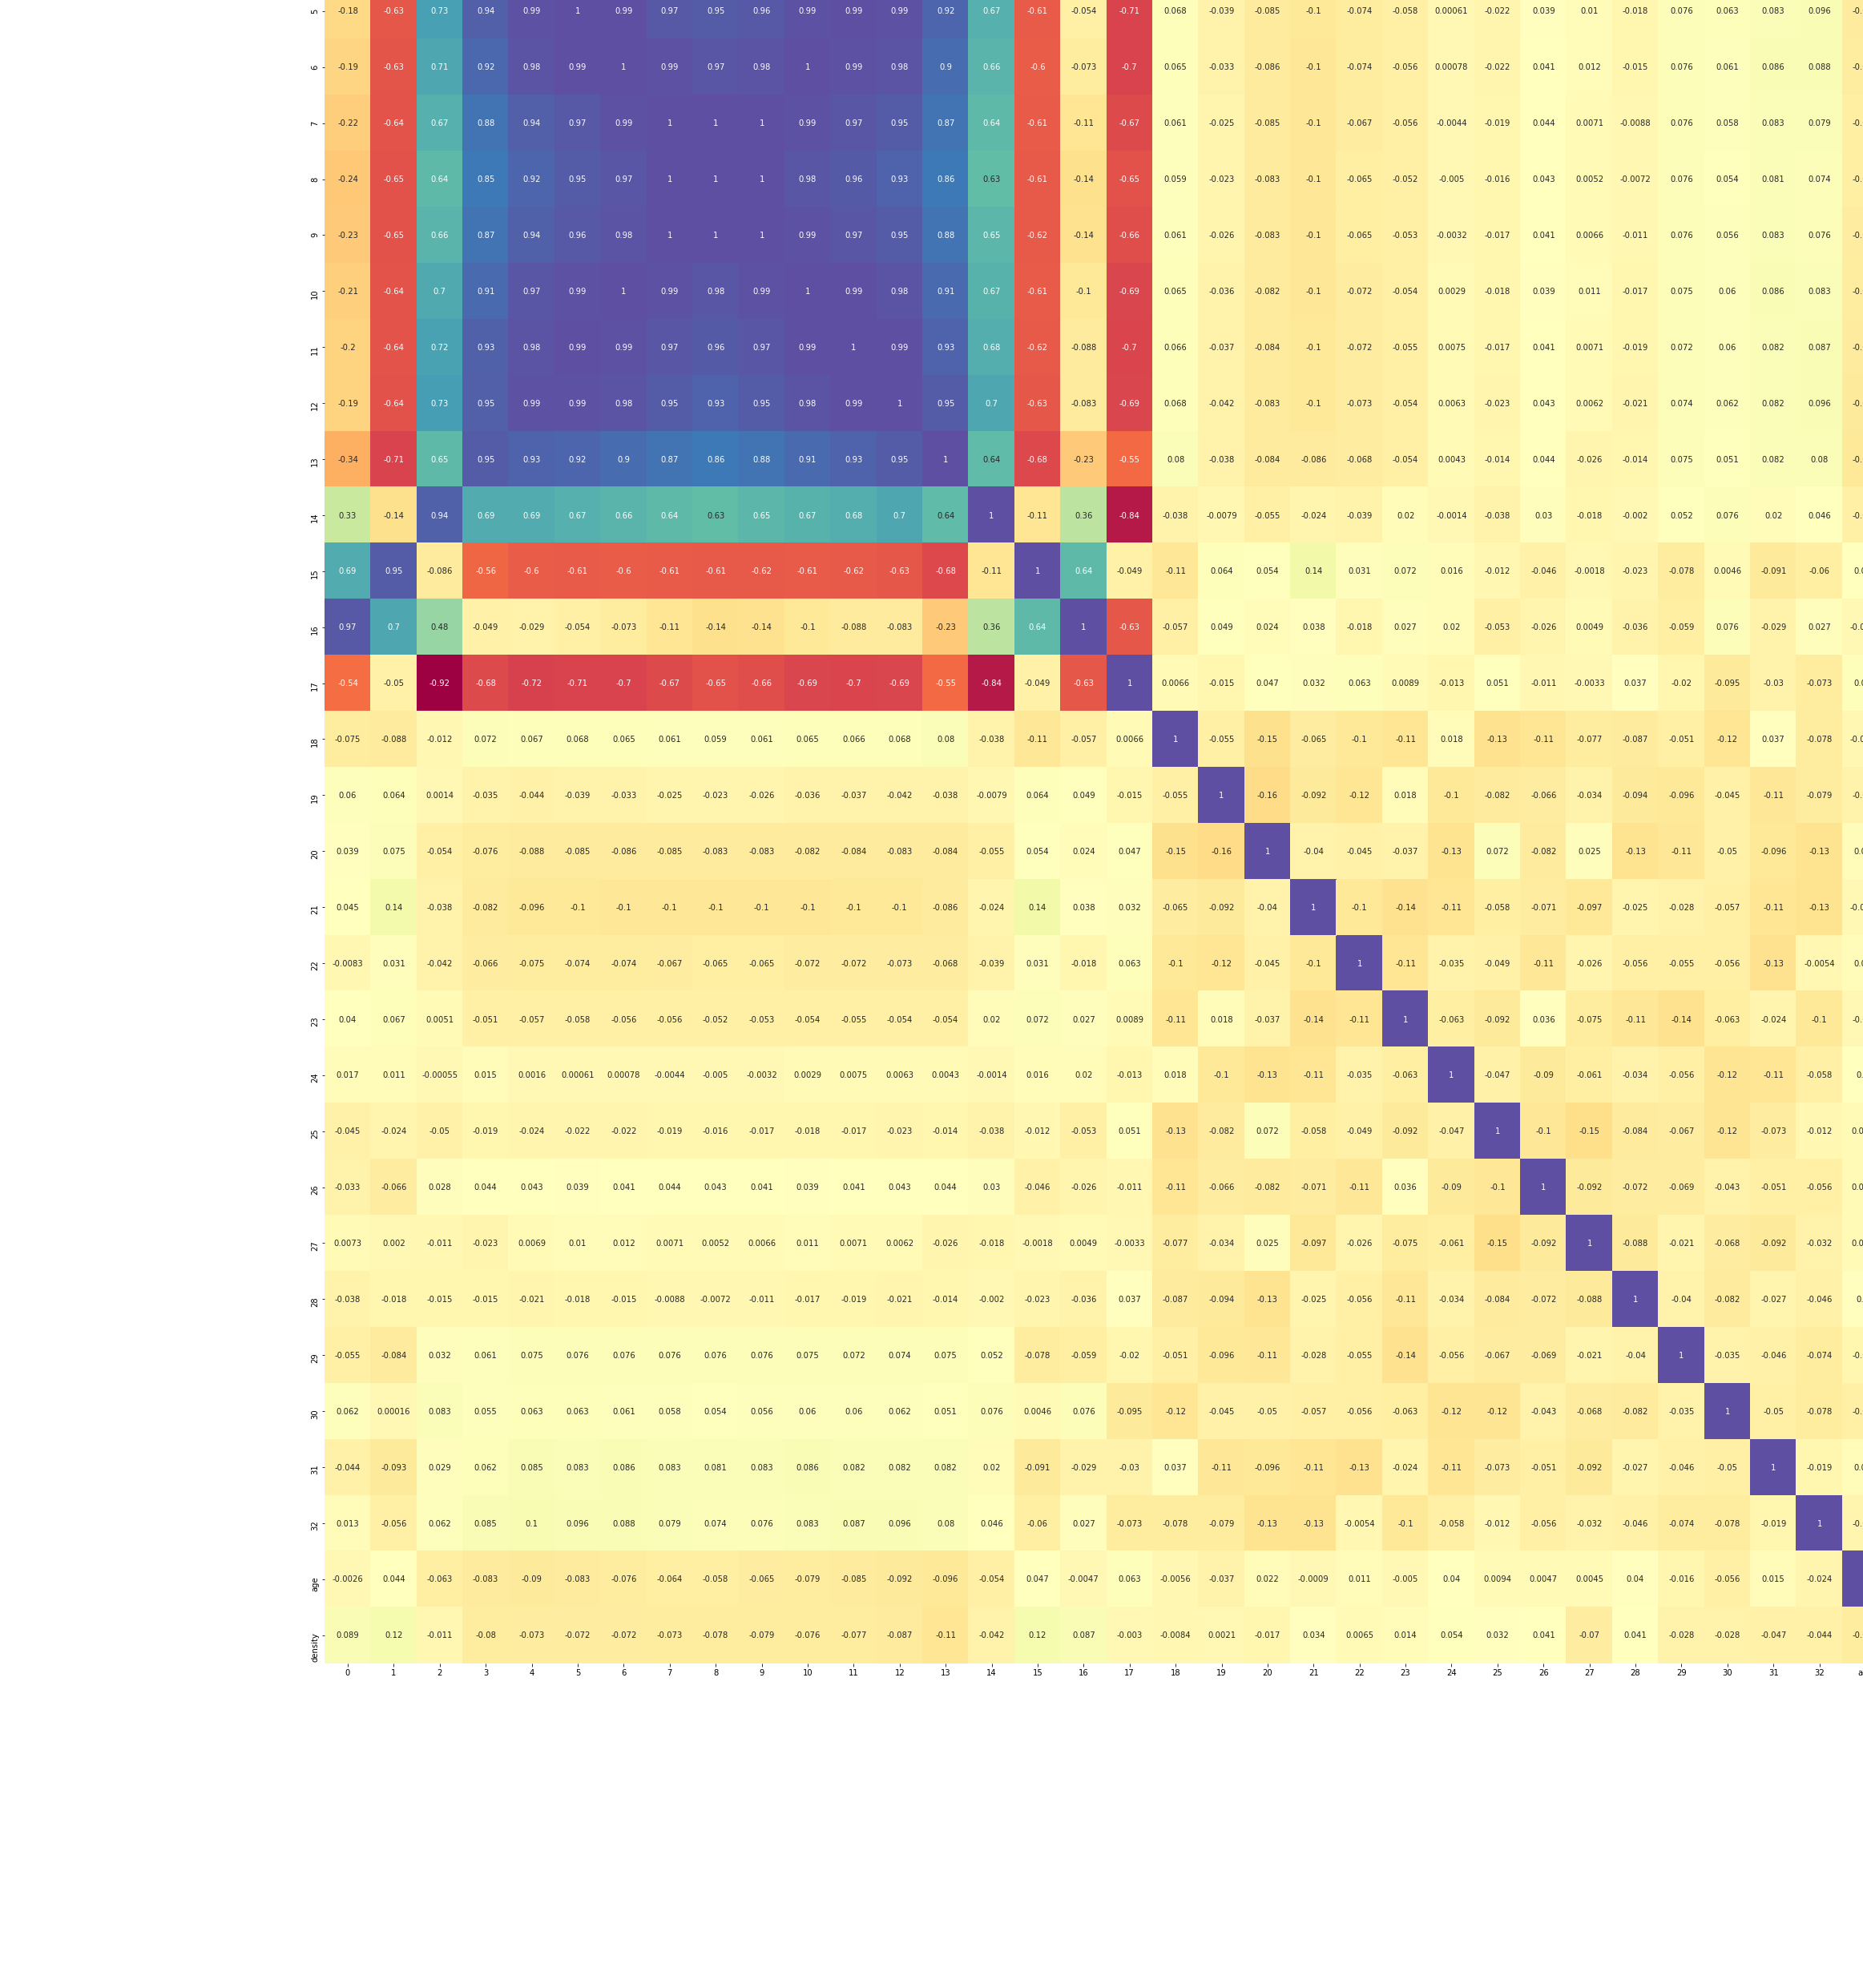

In [195]:
plt.figure(figsize=(45,45))
correlation = X.corr()
sns.heatmap(correlation,cmap='Spectral',annot=True) 

In [192]:
Y_Pred = classifier.predict(X_test)
acc = metrics.accuracy_score(Y_Pred,Y_test)
print('Testing accuracy is {:0.2f}%'.format(acc*100))
print(Y_test)
print(Y_Pred)

Testing accuracy is 84.38%
[0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 1 1 0 0 1 0]
[0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 0 0 1 0]


In [14]:
'''classifier2 = svm.SVC(kernel='poly',probability=True,gamma=1,C=10,degree=3)
classifier2.fit(X_train,Y_train)
Y_Pred = classifier2.predict(X_validation)
acc = metrics.accuracy_score(Y_Pred,Y_validation)
print('Validation accuracy is {:0.2f}%'.format(acc*100))
print(Y_validation)
print(Y_Pred)'''

"classifier2 = svm.SVC(kernel='poly',probability=True,gamma=1,C=10,degree=3)\nclassifier2.fit(X_train,Y_train)\nY_Pred = classifier2.predict(X_validation)\nacc = metrics.accuracy_score(Y_Pred,Y_validation)\nprint('Validation accuracy is {:0.2f}%'.format(acc*100))\nprint(Y_validation)\nprint(Y_Pred)"

In [193]:
from sklearn.decomposition import PCA

pca = PCA(n_components=29)
X_trainpca = pca.fit_transform(X_train)
X_testpca = pca.fit_transform(X_validation)
classifier1 = svm.SVC(kernel='rbf',random_state=42,tol=1e-5,C=10,verbose=2,gamma=0.12)
classifier1.fit(X_trainpca,Y_train)
Y_Pred = classifier1.predict(X_testpca)
acc = metrics.accuracy_score(Y_Pred,Y_validation)
print('Validation accuracy is {:0.2f}%'.format(acc*100))
print(Y_validation)
print(Y_Pred)

[LibSVM]Validation accuracy is 64.38%
[1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 0 1 0 1 1 0 1 1 0 1 0]
[1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 1 0]


In [15]:
'''from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier()
classifier4.fit(X_train,Y_train)
Y_pred = classifier4.predict(X_test)
acc = metrics.accuracy_score(Y_pred,Y_test)
print('Accuracy score using KNeighbors classifier is {0:.2f}% '.format(acc*100))'''

"from sklearn.neighbors import KNeighborsClassifier\nclassifier4 = KNeighborsClassifier()\nclassifier4.fit(X_train,Y_train)\nY_pred = classifier4.predict(X_test)\nacc = metrics.accuracy_score(Y_pred,Y_test)\nprint('Accuracy score using KNeighbors classifier is {0:.2f}% '.format(acc*100))"

<AxesSubplot:>

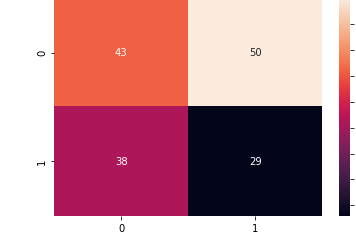

In [194]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_Pred,Y_test)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [183]:
'''from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(min_samples_split=2,random_state=42)
classifier5.fit(X_train,Y_train)
Y_pred = classifier5.predict(X_test)
acc = metrics.accuracy_score(Y_pred,Y_test)
print('Accuracy score using Decision Tree classifier is {:0.2f}%'.format(acc*100))'''

Accuracy score using Decision Tree classifier is 49.38%


In [143]:
'''from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_trainpca = pca.fit_transform(X_train)
X_testpca = pca.fit_transform(X_test)
from sklearn import svm,metrics
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import OneVsRestClassifier
classifier5 = svm.SVC(kernel='poly',probability=True,C=100,verbose=1,tol=1e-6,max_iter=-1)
#classifier = CalibratedClassifierCV(classifier)
#classifier = OneVsRestClassifier(classifier)
classifier5.fit(X_trainpca,Y_train)
Y_Pred = classifier5.predict(X_testpca)
acc = metrics.accuracy_score(Y_Pred,Y_test)
print('Accuracy is {:0.2f}%'.format(acc*100))
print(Y_test)
print(Y_Pred)
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier()
classifier5.fit(X_trainpca,Y_train)
Y_pred = classifier5.predict(X_testpca)
acc = metrics.accuracy_score(Y_pred,Y_test)
print('Accuracy score using Decision Tree classifier is {:0.2f}%'.format(acc*100))'''


[LibSVM]Accuracy is 40.28%
[0 2 0 0 0 1 2 1 0 2 2 1 2 0 2 1 0 0 0 1 1 2 2 0 1 2 2 0 0 0 2 2 1 0 1 0 0
 2 0 2 1 0 2 0 1 0 2 0 2 1 0 1 2 1 1 2 0 0 0 1 1 1 0 0 1 1 1 2 0 2 0 0 0 0
 1 2 1 0 0 2 1 0 1 2 0 1 0 1 0 0 2 0 1 0 1 0 0 1 0 2 1 0 1 2 2 0 0 2 2 1 2
 1 1 1 1 2 2 2 1 0 0 1 1 0 1 2 0 0 1 0 1 2 1 2 0 0 2 2 1 1 0 1 1 0 1 2 0 2
 0 1 1 0 2 1 2 2 2 0 2 1 1 0 1 1 0 1 1 2 2 1 2 2 0 0 0 1 1 0 1 1 0 2 2 0 0
 0 2 1 0 2 0 0 2 2 1 2 0 2 0 0 0 1 2 0 1 0 1 1 1 2 1]
[0 0 0 0 2 1 0 0 1 0 1 0 0 1 2 1 0 1 1 1 1 0 2 2 1 0 0 1 0 0 2 0 2 2 0 2 0
 0 0 1 1 1 0 1 0 0 2 2 1 1 1 2 2 2 1 2 2 2 0 2 0 1 1 1 1 0 1 1 0 2 1 0 0 0
 0 0 0 0 0 0 1 2 1 0 2 1 1 2 1 1 0 2 1 0 1 0 1 1 2 0 1 0 1 0 0 0 0 0 0 0 2
 1 2 0 2 2 1 1 1 0 2 2 1 0 1 1 1 0 0 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 1 0 0 1
 2 2 2 1 1 0 0 1 2 0 1 1 1 2 2 0 2 2 0 2 2 1 2 1 0 1 1 1 0 2 2 1 2 0 0 2 2
 0 1 1 1 0 2 0 2 0 1 0 2 1 0 1 1 1 0 0 1 2 1 1 0 0 1]


"from sklearn.tree import DecisionTreeClassifier\nclassifier5 = DecisionTreeClassifier()\nclassifier5.fit(X_trainpca,Y_train)\nY_pred = classifier5.predict(X_testpca)\nacc = metrics.accuracy_score(Y_pred,Y_test)\nprint('Accuracy score using Decision Tree classifier is {:0.2f}%'.format(acc*100))"

In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier()
classifier6.fit(X_train,Y_train)
Y_pred = classifier6.predict(X_test)
acc = metrics.accuracy_score(Y_pred,Y_test)
print('Accuracy score using Random Tree classifier is {:0.2f}%'.format(acc*100))

Accuracy score using Random Tree classifier is 55.62%


In [248]:
X_test1 = pd.DataFrame(X_test1)
#X1 = sc.fit_transform(X1)
s = []
t = []
for i in range(len(X_test1)):
    j=X_test1.iloc[i,0]
    s.append(j)
for i in range(len(X)):
    j= X.iloc[i,0]
    t.append(j)
    '''if j in X[0]:
        s.append(X.iloc[i,41])
        print('yes')  
    else:
        print('no')'''  
u = []
Y_test1 = Y_test
Y_test1 = pd.DataFrame(Y_test1)
for i in s:
    l = 0
    for j in t:
        l+=1
        if i == j:
            u.append(l)
print(u)
pn =[]
for i in u:
    pn.append(X.iloc[i,41])
pn = pd.DataFrame(pn)
Y_pred = pd.DataFrame(Y_Pred)
Y_pred[1] = pn
Y_pred

[26, 324, 635, 288, 552, 638, 734, 466, 711, 191, 167, 29, 591, 3, 371, 268, 359, 731, 163, 375, 236, 280, 772, 133, 95, 435, 303, 312, 688, 477, 58, 647, 773, 35, 369, 653, 383, 780, 717, 743, 11, 283, 530, 441, 172, 390, 89, 744, 447, 607, 33, 297, 405, 339, 462, 387, 8, 214, 62, 687, 762, 550, 31, 14, 579, 673, 183, 25, 634, 188, 350, 665, 610, 548, 200, 527, 710, 501, 98, 391, 485, 32, 409, 581, 115, 560, 776, 476, 44, 301, 404, 553, 600, 275, 212, 22, 631, 412, 84, 63, 282, 361, 336, 269, 758, 348, 136, 502, 698, 349, 58, 647, 773, 407, 290, 555, 770, 520, 288, 552, 638, 759, 54, 522, 741, 243, 169, 460, 344, 648, 250, 482, 606, 612, 317, 660, 505, 415, 590, 386, 145, 636, 67, 461, 270, 367, 215, 719, 423, 536, 227, 651, 563, 592, 396, 175, 408, 137, 270, 367, 558, 93, 506, 40, 398, 68, 231, 173, 595, 472, 500, 2, 641, 271, 650, 483, 541, 221, 662, 701, 46, 109, 249, 331, 217, 218, 489, 490, 82, 118, 401, 613, 437, 757, 65, 681]


,0,1
0,0,24
1,2,850
2,1,260
3,1,799
4,1,769
...,...,...
206,0,NaN
207,0,NaN
208,2,NaN
209,1,NaN


In [249]:
output = pd.ExcelWriter('output.xlsx')
Y_pred.to_excel(output)
output.save()

<AxesSubplot:>

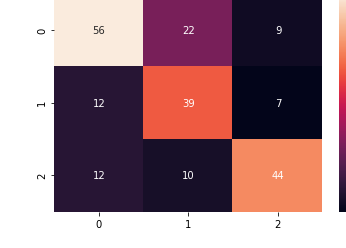

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_Pred,Y_test)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [145]:
'''from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
yP = nb.predict(X_test)
acc = metrics.accuracy_score(Y_pred,Y_test)
print('Accuracy score using Decision Tree classifier is {:0.2f}%'.format(acc*100))'''

Accuracy score using Decision Tree classifier is 55.92%


In [ ]:
'''from sklearn.model_selection import KFold
kf =KFold(n_splits=5)
kf.get_n_splits(X_res)

for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    Y_train,Y_test = Y[train_index],Y[test_index]
    '''


array([[-0.14120157,  0.77601696, -2.1691068 , ...,  0.31758326,
        -1.72933532, -0.14225592],
       [ 0.89033898,  1.10203587,  1.04094509, ...,  0.66006816,
        -2.31075114, -0.58588756],
       [ 0.25751473, -0.34501213, -0.56066789, ...,  1.04524257,
        -0.30712869,  1.89912723],
       ...,
       [ 0.73265501,  0.69507971, -0.36085986, ...,  0.52474156,
        -0.6706508 ,  0.41936622],
       [ 0.4406931 ,  0.7636365 ,  0.14021411, ..., -1.40589864,
        -0.58152359, -0.98087629],
       [-0.36907641, -0.02871324, -0.26224015, ...,  0.59478694,
         0.42030411, -1.65641894]])